In [1]:
import pandas as pd
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


In [2]:
df, meta = pyreadstat.read_sav("/Users/juansebastianquintanacontreras/Desktop/Proyecto_seminario/CACU1985A2019.sav")
print(df.head())  # Ver las primeras filas del DataFrame

PyreadstatError: File /Users/juansebastianquintanacontreras/Desktop/Proyecto_seminario/CACU1985A2019.sav does not exist!

In [95]:
df['ANO'] = df['ANO'].astype(int)
df = df.sort_values(by='ANO')

In [96]:
df

,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,COD_INST,NOM_INST,ANO,MES,SEXO,EST_CIVIL,...,C_ANT32,C_PAT1,C_PAT2,C_BAS1,C_MCM1,IDPROFCER,CAUSA_666_667,CAU_HOMOL,QUINQ,EDAD2
48930,76,001,1,2,,,1985,07,2,2,...,,,,1809,,,,025,85A89,85y+
17083,11,001,1,1,,,1985,05,2,3,...,,,,1809,,,,025,85A89,50a54
17084,11,001,1,2,,,1985,05,2,2,...,,,,1809,,,,025,85A89,50a54
17085,11,001,1,2,,,1985,05,2,2,...,,,,1809,,,,025,85A89,50a54
17086,11,001,1,2,,,1985,07,2,2,...,,,,1809,,,,025,85A89,50a54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,47,1,1,1,,,2019,,2,5,...,,,,C539,,1,207,25,15A19,35a39
6784,47,1,1,1,,,2019,,2,1,...,,,,C539,,1,207,25,15A19,35a39
6783,47,720,1,2,,,2019,,2,4,...,,,,C539,,1,207,25,15A19,35a39
6797,63,1,1,1,,,2019,,2,2,...,,,,C539,,1,207,25,15A19,35a39


In [97]:
conteo_valores = df['A_DEFUN'].value_counts()
print(conteo_valores)

A_DEFUN
1    46697
2     4470
3      281
Name: count, dtype: int64


In [98]:
df.columns

Index(['COD_DPTO', 'COD_MUNIC', 'A_DEFUN', 'SIT_DEFUN', 'COD_INST', 'NOM_INST',
       'ANO', 'MES', 'SEXO', 'EST_CIVIL', 'gru_ed1', 'gru_ed2', 'NIVEL_EDU',
       'MUERTEPORO', 'SIMUERTEPO', 'OCUPACION', 'IDPERTET', 'CODPRES',
       'CODPTORE', 'CODMUNRE', 'AREA_RES', 'SEG_SOCIAL', 'IDADMISALU',
       'IDCLASADMI', 'pman_muer', 'CONS_EXP', 'CODOCUR', 'CODMUNOC',
       'c_muerte', 'ASIS_MED', 'CAUSA_MULT', 'C_DIR1', 'C_DIR12', 'C_ANT1',
       'C_ANT12', 'C_ANT2', 'C_ANT22', 'C_ANT3', 'C_ANT32', 'C_PAT1', 'C_PAT2',
       'C_BAS1', 'C_MCM1', 'IDPROFCER', 'CAUSA_666_667', 'CAU_HOMOL', 'QUINQ',
       'EDAD2'],
      dtype='object')

In [99]:
df_juan = df[df.columns[-16:]]
df_juan

,C_DIR12,C_ANT1,C_ANT12,C_ANT2,C_ANT22,C_ANT3,C_ANT32,C_PAT1,C_PAT2,C_BAS1,C_MCM1,IDPROFCER,CAUSA_666_667,CAU_HOMOL,QUINQ,EDAD2
48930,,,,,,,,,,1809,,,,025,85A89,85y+
17083,,,,,,,,,,1809,,,,025,85A89,50a54
17084,,,,,,,,,,1809,,,,025,85A89,50a54
17085,,,,,,,,,,1809,,,,025,85A89,50a54
17086,,,,,,,,,,1809,,,,025,85A89,50a54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,,,,,,,,,,C539,,1,207,25,15A19,35a39
6784,,,,,,,,,,C539,,1,207,25,15A19,35a39
6783,,,,,,,,,,C539,,1,207,25,15A19,35a39
6797,,,,,,,,,,C539,,1,207,25,15A19,35a39


## Contexto de Variables en el DataFrame `df_juan`

A continuación, se describe el significado de cada variable en el DataFrame.

| Variable    | Descripción                                                                         |
| ----------- | ----------------------------------------------------------------------------------- |
| `C_DIR12`   | Código de la segunda causa de defunción informada en el renglón a).                 |
| `C_ANT1`    | Causas Antecedentes 1.                                                              |
| `C_ANT12`   | Código de la segunda causa de defunción informada en el renglón b).                 |
| `C_ANT2`    | Causas Antecedentes 2.                                                              |
| `C_ANT22`   | Código de la segunda causa de defunción informada en el renglón c).                 |
| `C_ANT3`    | Causas Antecedentes 3.                                                              |
| `C_ANT32`   | Código de la segunda causa de defunción informada en el renglón d).                 |
| `C_PAT1`    | Otros estados patológicos importantes.                                              |
| `C_PAT2`    | Código de la causa de defunción informada en otros estados patológicos importantes. |
| `C_BAS1`    | Código de la causa básica de la defunción.                                          |
| `C_MCM1`    | Código de la causa de defunción informada en muerte sin certificación médica.       |
| `IDPROFCER` | Profesión de quien certifica la defunción. Posibles valores:                        |
| `CAUSA_666_667` | Causa agrupada con base en la Lista 6/67 de la OPS. Ejemplos:                   |
| `CAU_HOMOL`   | Causa básica agrupada con base en la Lista 105 Colombia (No usar esta variable).  |
| `QUINQ`       | No usar esta variable.                                                            |
| `EDAD2`       | Edad en rangos quinquenales.                                                      |


`IDPROFCER`:
1. Médico
2. Enfermero
3. Auxiliar de enfermería
4. Promotor(a) de salud
5. Funcionario de registro civil
6. Médico Legista
7. Sin información 
----------------------------------------------------------------------------------------------------

`CAUSA_666_667`:
- 202 T. MALIGNO DEL COLON
- 203 T. MALIGNO DE LOS ÓRGANOS DIGESTIVOS Y DEL PERITONEO, EXCLUYENDO ESTÓMAGO Y COLON
- 210 T. MALIGNO DE LA PRÓSTATA 
----------------------------------------------------------------------------------------------------




In [100]:
info_df = df_juan.info()
missing_values = df_juan.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 51448 entries, 48930 to 27855
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   C_DIR12        51448 non-null  object
 1   C_ANT1         51448 non-null  object
 2   C_ANT12        51448 non-null  object
 3   C_ANT2         51448 non-null  object
 4   C_ANT22        51448 non-null  object
 5   C_ANT3         51448 non-null  object
 6   C_ANT32        51448 non-null  object
 7   C_PAT1         51448 non-null  object
 8   C_PAT2         51448 non-null  object
 9   C_BAS1         51448 non-null  object
 10  C_MCM1         51448 non-null  object
 11  IDPROFCER      51448 non-null  object
 12  CAUSA_666_667  51448 non-null  object
 13  CAU_HOMOL      51448 non-null  object
 14  QUINQ          51448 non-null  object
 15  EDAD2          51448 non-null  object
dtypes: object(16)
memory usage: 6.7+ MB


In [101]:
# valores nulos 
nulos = df_juan.isna().sum()

# valores que son solo espacios en blanco
espacios_blanco = (df_juan.astype(str).apply(lambda x: x.str.strip() == "")).sum()

# valores (")
comillas = (df_juan.astype(str).apply(lambda x: x.str.strip() == '"')).sum()
resumen_valores = pd.DataFrame({
    'Columna': df_juan.columns, 
    'Nulos': nulos.values, 
    'Espacios en blanco': espacios_blanco.values, 
    'Solo comillas': comillas.values
})
resumen_valores = resumen_valores.sort_values(by=['Nulos', 'Espacios en blanco', 'Solo comillas'], 
                                              ascending=False)

print(resumen_valores)

          Columna  Nulos  Espacios en blanco  Solo comillas
6         C_ANT32      0               49563           1709
10         C_MCM1      0               49524           1726
0         C_DIR12      0               49490           1706
4         C_ANT22      0               49386           1681
2         C_ANT12      0               49317           1673
8          C_PAT2      0               48968           1627
5          C_ANT3      0               43272           1302
7          C_PAT1      0               42527           1260
3          C_ANT2      0               32175            630
11      IDPROFCER      0               31757              0
1          C_ANT1      0               22844            198
12  CAUSA_666_667      0               15462              0
15          EDAD2      0                 339              0
9          C_BAS1      0                   0              0
13      CAU_HOMOL      0                   0              0
14          QUINQ      0                

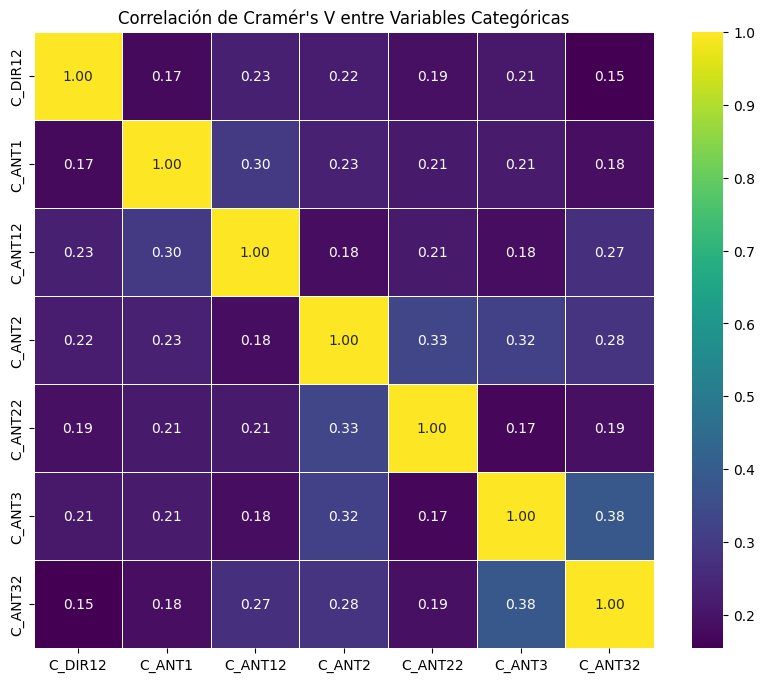

In [102]:
# Variables categóricas a analizar
categorical_vars = ["C_DIR12", "C_ANT1", "C_ANT12", "C_ANT2", "C_ANT22", "C_ANT3", "C_ANT32"]

# Crear una función para calcular Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Crear una matriz de correlación de Cramér's V
corr_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars, dtype=float)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 == var2:
            corr_matrix.loc[var1, var2] = 1.0  
        else:
            corr_matrix.loc[var1, var2] = cramers_v(df_juan[var1].fillna("missing"), df_juan[var2].fillna("missing"))

# Graficar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlación de Cramér's V entre Variables Categóricas")
plt.show()


### Cada valor en C_DIR12

<class 'pandas.core.series.Series'>
Index: 65 entries, N19 to J960
Series name: count
Non-Null Count  Dtype
--------------  -----
65 non-null     int64
dtypes: int64(1)
memory usage: 1.0+ KB


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/3179698443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/3179698443.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha


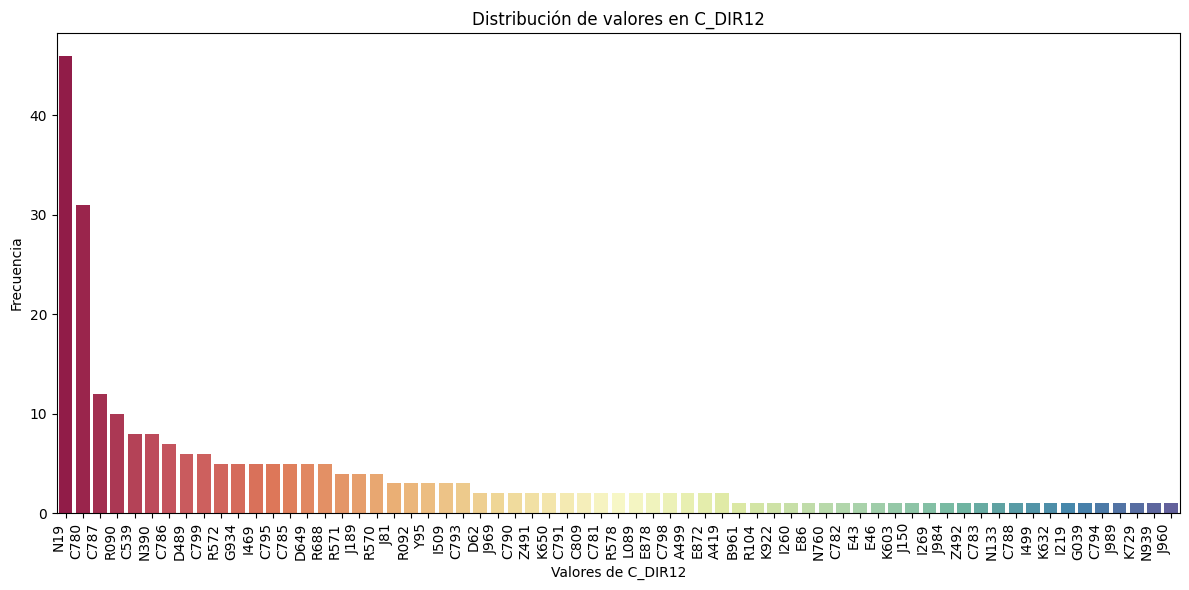

In [103]:
frecuencia = df_juan['C_DIR12'].value_counts().drop(labels=['', '"'], errors='ignore')
frecuencia.info()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_DIR12")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_DIR12")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha

plt.tight_layout()
plt.show()

### Analisis de "C_ANT1", "C_ANT2", "C_ANT3"

In [104]:
variables = ["C_ANT1", "C_ANT2", "C_ANT3"]

for var in variables:
    valores_unicos = df_juan[var].dropna().unique()  # Elimina NaN
    valores_unicos = [v for v in valores_unicos if v not in ["", '"']]  # Excluye vacíos y comillas
    print(f"Valores únicos en {var}:")
    print(valores_unicos)
    print("\n" + "-"*50 + "\n")


Valores únicos en C_ANT1:
['C539', 'I829', 'A419', 'G932', 'D649', 'I269', 'C780', 'C793', 'K566', 'C80X', 'I499', 'N179', 'J81X', 'J960', 'I469', 'R58K', 'N823', 'G934', 'J869', 'N19X', 'E46X', 'D696', 'E43X', 'I10X', 'J449', 'J969', 'C787', 'A09X', 'R571', 'C788', 'C798', 'I129', 'J181', 'N139', 'N939', 'J189', 'N189', 'C791', 'N159', 'I509', 'C783', 'C763', 'C482', 'E875', 'C786', 'C795', 'R568', 'E469', 'R688', 'K830', 'D539', 'K659', 'E878', 'R18X', 'K729', 'N133', 'C796', 'T794', 'I64X', 'N199', 'I420', 'I678', 'K929', 'K920', 'N10X', 'E86X', 'C530', 'J984', 'T678', 'J90X', 'I219', 'I517', 'I500', 'I270', 'J439', 'N361', 'C56X', 'R64X', 'I251', 'D62X', 'J180', 'N921', 'L022', 'G931', 'J80X', 'J980', 'E872', 'F835', 'N12X', 'R630', 'N399', 'N138', 'L905', 'K922', 'E119', 'I749', 'R092', 'N390', 'I279', 'R402', 'J398', 'I802', 'R58X', 'C785', 'C349', 'K650', 'J698', 'E149', 'M623', 'D70X', 'D509', 'I639', 'K520', 'I519', 'C790', 'I319', 'I730', 'K628', 'R99X', 'R100', 'C710', 'N288

In [105]:
frecuencia_total = {}

for var in variables:
    frecuencia = df_juan[var].value_counts() 
    frecuencia = frecuencia.drop(labels=['', '"'], errors='ignore')  # Excluye vacíos y comillas
    frecuencia_total[var] = frecuencia  

# Crear un DataFrame combinando las frecuencias de cada variable
tabla_frecuencia = pd.DataFrame(frecuencia_total).fillna(0).astype(int)
tabla_frecuencia["Total"] = tabla_frecuencia.sum(axis=1)
tabla_frecuencia = tabla_frecuencia.sort_values(by="Total", ascending=False)
print(tabla_frecuencia)

      C_ANT1  C_ANT2  C_ANT3  Total
C539    8976    9664    4788  23428
C780    1708     705      88   2501
C80X    1079     375      41   1495
D649     881     422     103   1406
N189     736     437      73   1246
...      ...     ...     ...    ...
I780       1       0       0      1
I779       1       0       0      1
I772       1       0       0      1
I741       1       0       0      1
J42        1       0       0      1

[896 rows x 4 columns]


In [106]:
for var in variables:
    frecuencia = df_juan[var].value_counts() 
    frecuencia = frecuencia.drop(labels=['', '"'], errors='ignore')  # Excluye vacíos y comillas
    frecuencia = frecuencia.reset_index()  
    frecuencia.columns = [var, "Frecuencia"]  
    frecuencia = frecuencia.sort_values(by="Frecuencia", ascending=False)  # Ordena de mayor a menor
    
    print(f"\nTabla de frecuencia para {var}:\n")
    print(frecuencia.head(10))  
    print("\n" + "-"*50 + "\n")



Tabla de frecuencia para C_ANT1:

  C_ANT1  Frecuencia
0   C539        8976
1   C780        1708
2   C80X        1079
3   R688         906
4   D649         881
5   N390         770
6   N189         736
7   J969         538
8   A419         513
9   I469         429

--------------------------------------------------


Tabla de frecuencia para C_ANT2:

  C_ANT2  Frecuencia
0   C539        9664
1   C780         705
2   N189         437
3   D649         422
4   C80X         375
5   C798         296
6   N390         288
7   N139         261
8    C80         177
9   N939         172

--------------------------------------------------


Tabla de frecuencia para C_ANT3:

  C_ANT3  Frecuencia
0   C539        4788
1   D649         103
2   C798          98
3   I469          96
4   C780          88
5   N189          73
6   C530          73
7    I10          55
8   N390          50
9   C531          45

--------------------------------------------------



/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/213850231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.values, y=frecuencia.index, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/213850231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.values, y=frecuencia.index, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/213850231.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.values, y=frecuencia.index, pal

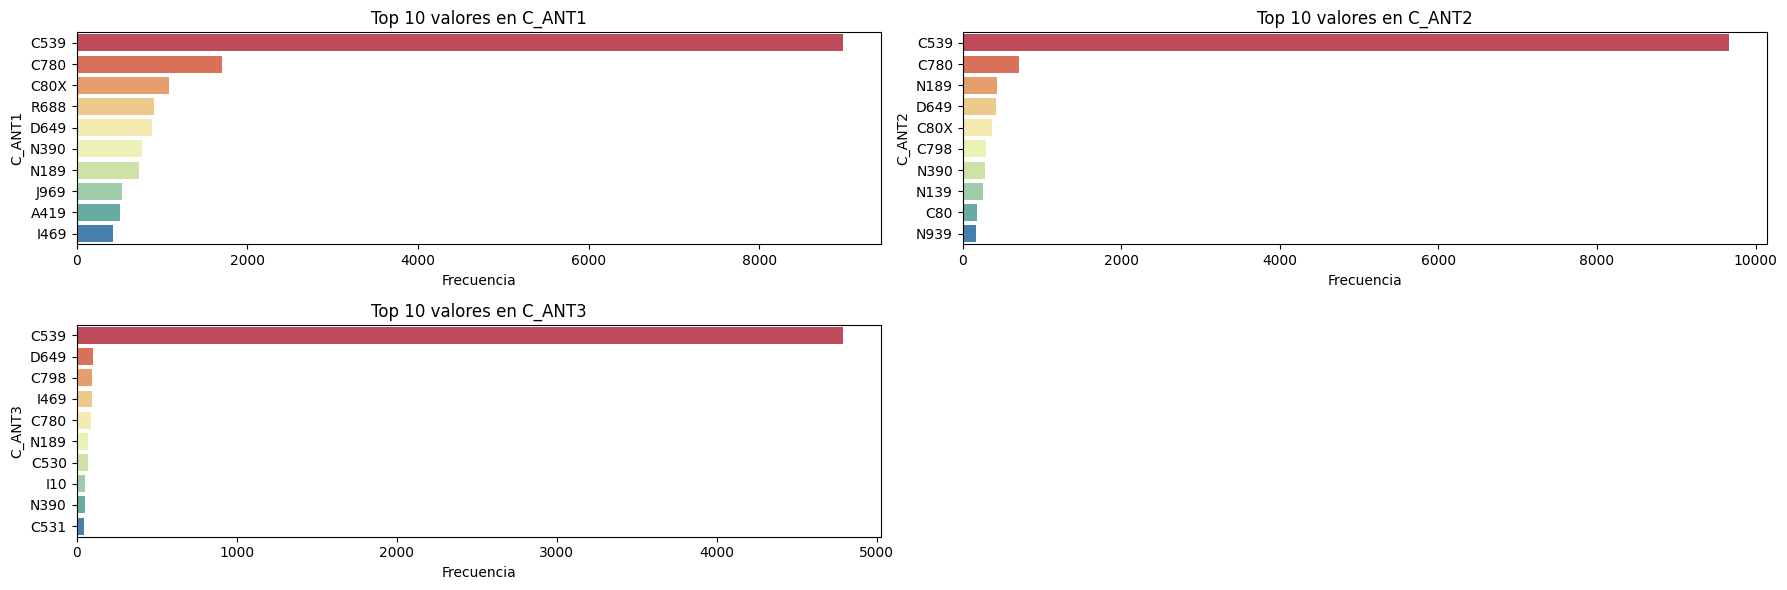

In [107]:
plt.figure(figsize=(18, 6)) 

for i, var in enumerate(variables, 1):
    frecuencia = df_juan[var].value_counts().drop(labels=['', '"'], errors='ignore').head(10)  # Excluye vacíos y comillas
    
    plt.subplot(2, 2, i)  # Crea subgráficos (1 fila, 3 columnas)
    sns.barplot(x=frecuencia.values, y=frecuencia.index, palette="Spectral")
    
    plt.xlabel("Frecuencia")
    plt.ylabel(var)
    plt.title(f"Top 10 valores en {var}")

plt.tight_layout()  # Ajusta para que no se solapen
plt.show()

### Cada valor en C_ANT12

<class 'pandas.core.series.Series'>
Index: 103 entries, C780 to E889
Series name: count
Non-Null Count  Dtype
--------------  -----
103 non-null    int64
dtypes: int64(1)
memory usage: 1.6+ KB


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/380555095.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/380555095.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha


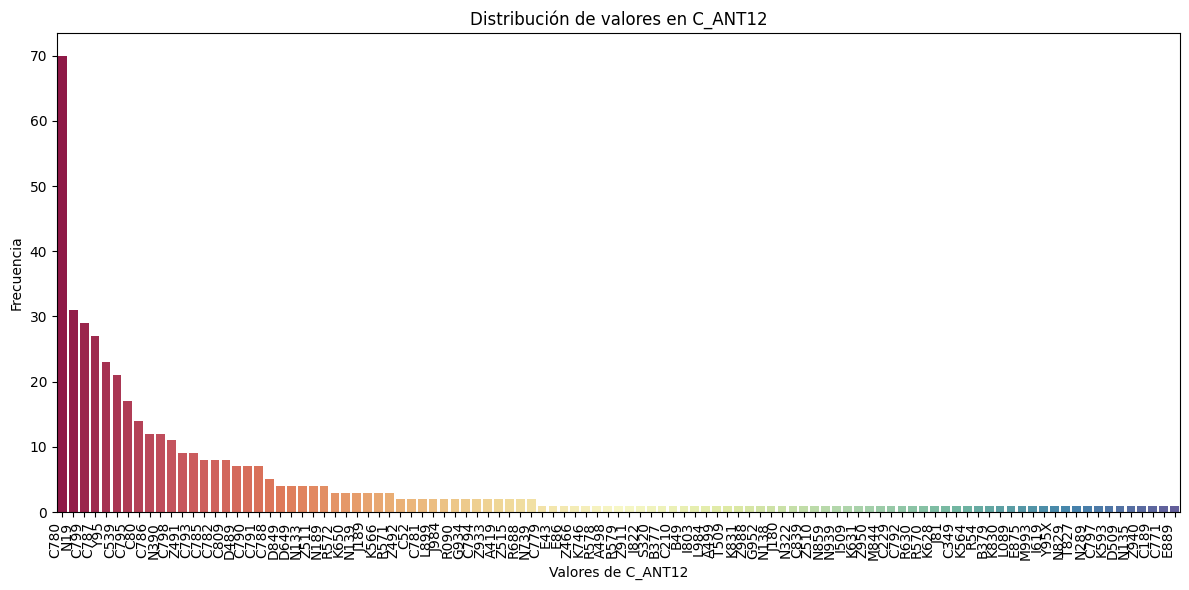

In [108]:
 
frecuencia = df_juan['C_ANT12'].value_counts().drop(labels=['', '"'], errors='ignore')
frecuencia.info()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_ANT12")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_ANT12")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha

plt.tight_layout()
plt.show()

### Cada valor en C_ANT22

<class 'pandas.core.series.Series'>
Index: 98 entries, C780 to Z940
Series name: count
Non-Null Count  Dtype
--------------  -----
98 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/766218196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/766218196.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha


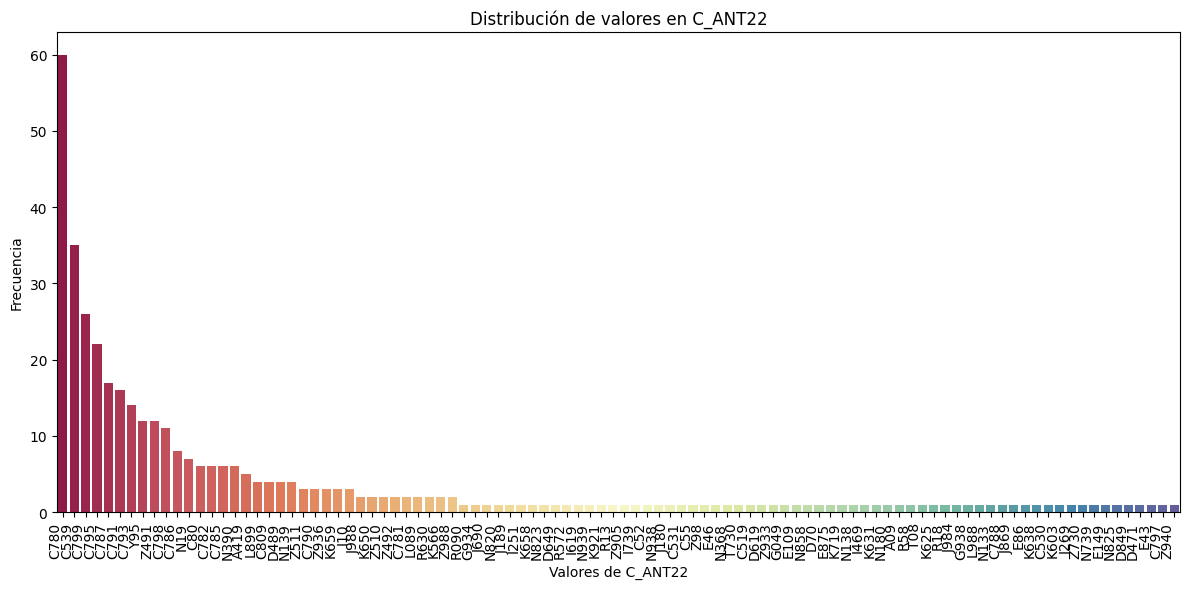

In [109]:
 
frecuencia = df_juan['C_ANT22'].value_counts().drop(labels=['', '"'], errors='ignore')
frecuencia.info()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_ANT22")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_ANT22")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha

plt.tight_layout()
plt.show()

### Cada valor en C_ANT32

<class 'pandas.core.series.Series'>
Index: 66 entries, C539 to Z515
Series name: count
Non-Null Count  Dtype
--------------  -----
66 non-null     int64
dtypes: int64(1)
memory usage: 1.0+ KB


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/3534065957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/3534065957.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha


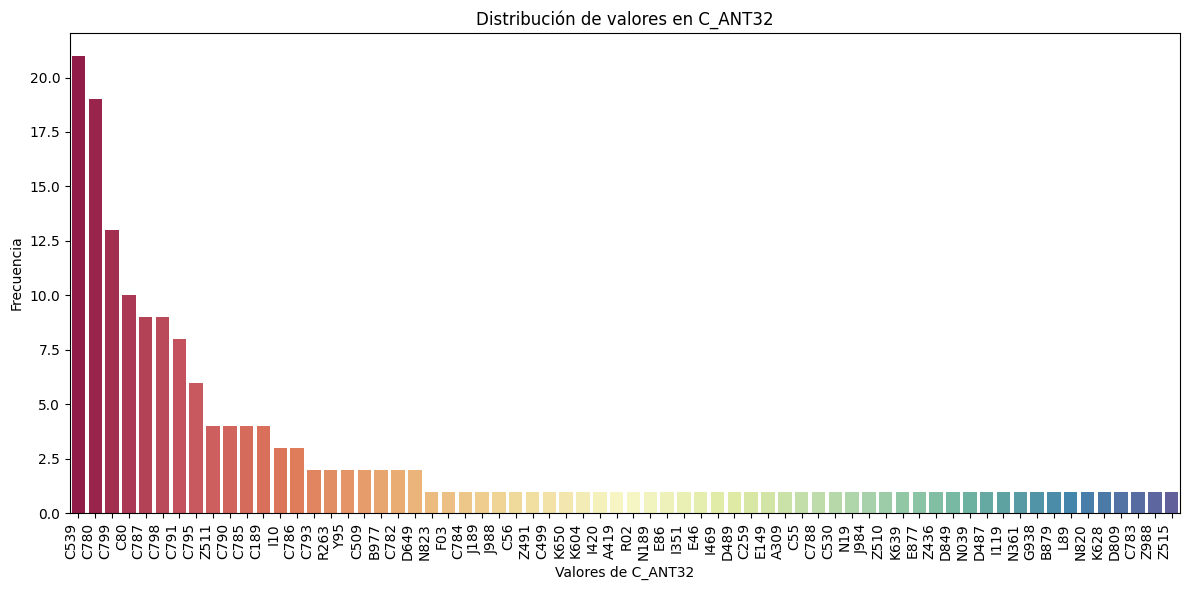

In [110]:

frecuencia = df_juan['C_ANT32'].value_counts().drop(labels=['', '"'], errors='ignore')
frecuencia.info()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_ANT32")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_ANT32")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Alinea a la derecha

plt.tight_layout()
plt.show()

In [111]:

tabla_frecuencia = df_juan['C_ANT32'].value_counts().drop(labels=['', '"'], errors='ignore').reset_index()
tabla_frecuencia.columns = ['Valor', 'Frecuencia']
print(tabla_frecuencia.head(15))


   Valor  Frecuencia
0   C539          21
1   C780          19
2   C799          13
3    C80          10
4   C787           9
5   C798           9
6   C791           8
7   C795           6
8   Z511           4
9   C790           4
10  C785           4
11  C189           4
12   I10           3
13  C786           3
14  C793           2


### Cada valor en C_PAT1

<class 'pandas.core.series.Series'>
Index: 519 entries, C539 to J42
Series name: count
Non-Null Count  Dtype
--------------  -----
519 non-null    int64
dtypes: int64(1)
memory usage: 8.1+ KB


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/3272095474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/3272095474.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


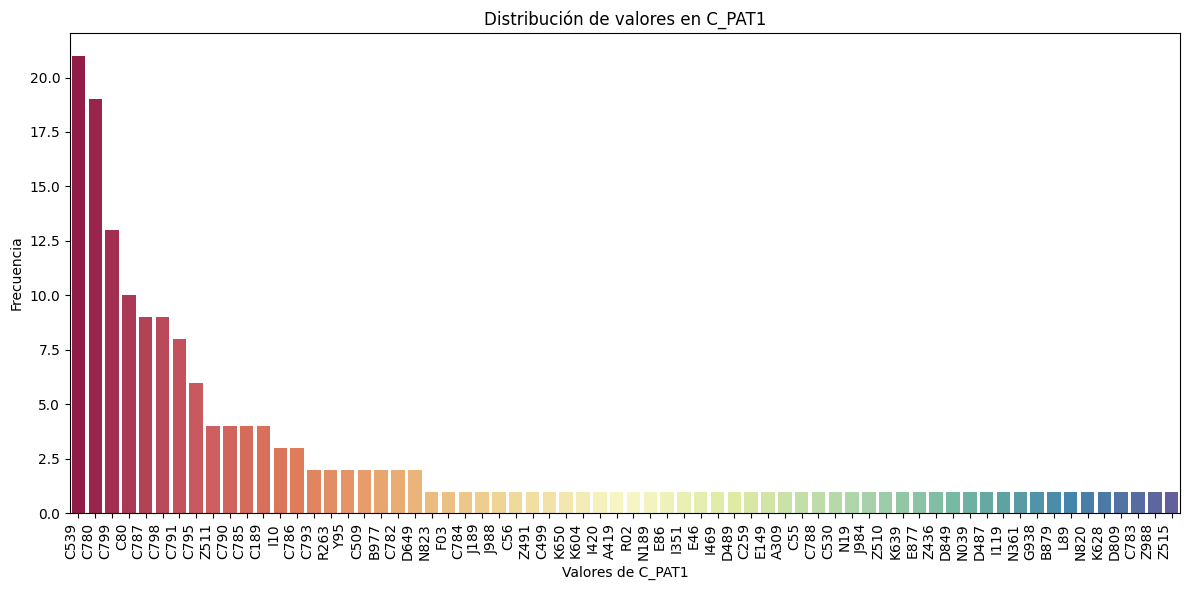

In [112]:
# Contar la frecuencia de los valores en C_PAT1, excluyendo valores vacíos y comillas
frecuencia_pat1 = df_juan['C_PAT1'].value_counts().drop(labels=['', '"'], errors='ignore')
frecuencia_pat1.info()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_PAT1")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_PAT1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()


### Cada valor en C_PAT2

C_PAT2
C539    72
I10     64
D649    48
E149    36
N189    33
        ..
D689     1
S129     1
N859     1
K769     1
A499     1
Name: count, Length: 199, dtype: int64


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/2189661696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/2189661696.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


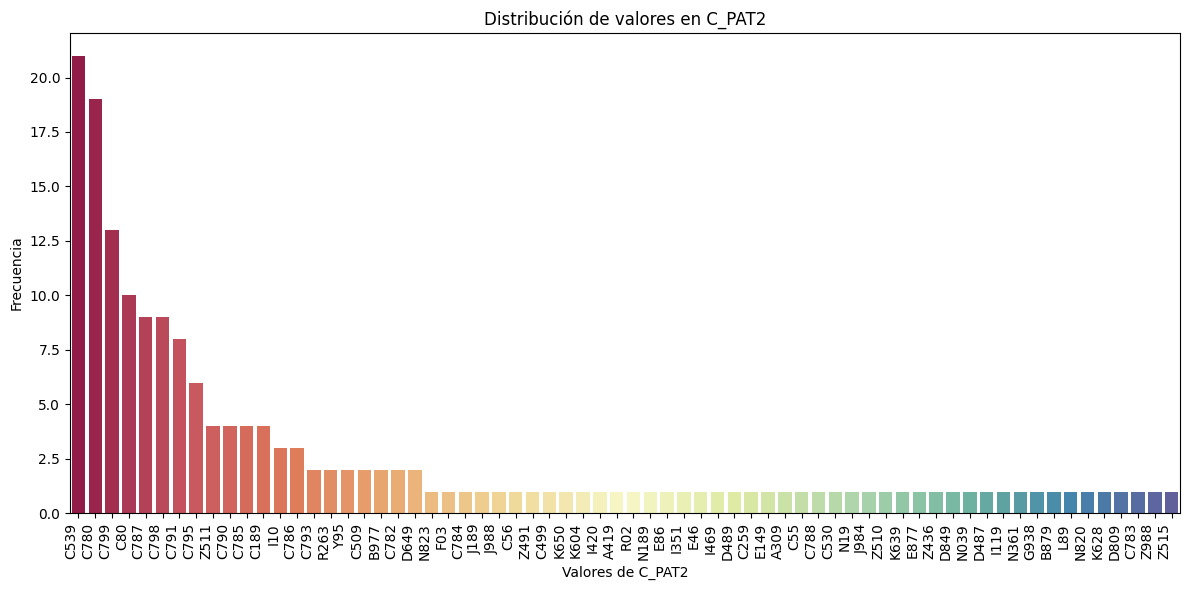

In [113]:
frecuencia_pat2 = df_juan['C_PAT2'].value_counts().drop(labels=['', '"'], errors='ignore')
print(frecuencia_pat2)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="Spectral")
plt.xlabel("Valores de C_PAT2")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_PAT2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()

### Cada valor en C_BAS1

C_BAS1
C539    36382
1809    13858
C530      631
C531      365
1800      137
C538       56
1808       12
1801        7
Name: count, dtype: int64


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/750162914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia_bas1.index[:20], y=frecuencia_bas1.values[:20], palette="coolwarm")  # Top 20 valores más comunes
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/750162914.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


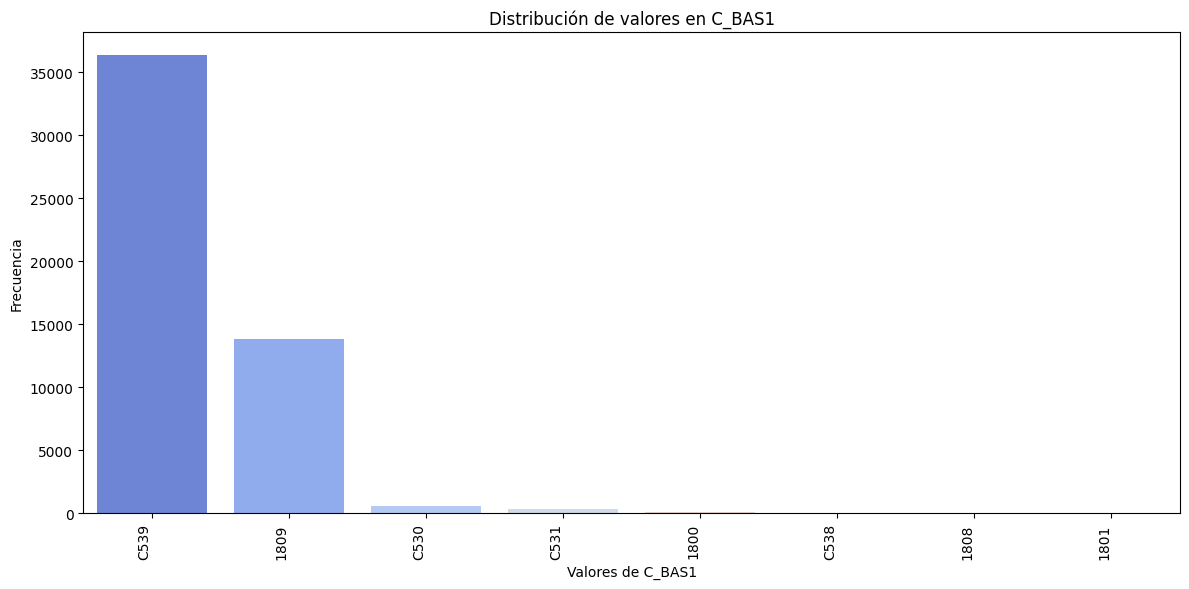

In [114]:
# Contar la frecuencia de valores en C_BAS1, excluyendo vacíos y comillas
frecuencia_bas1 = df_juan['C_BAS1'].value_counts().drop(labels=['', '"'], errors='ignore')
print(frecuencia_bas1)
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia_bas1.index[:20], y=frecuencia_bas1.values[:20], palette="coolwarm")  # Top 20 valores más comunes
plt.xlabel("Valores de C_BAS1")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_BAS1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()


### Cada valor en C_MCM1

C_MCM1
C539    196
C538      1
C530      1
Name: count, dtype: int64


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/1462346214.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia_mcm1.index[:20], y=frecuencia_mcm1.values[:20], palette="magma")  # Top 20 valores más comunes
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/1462346214.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


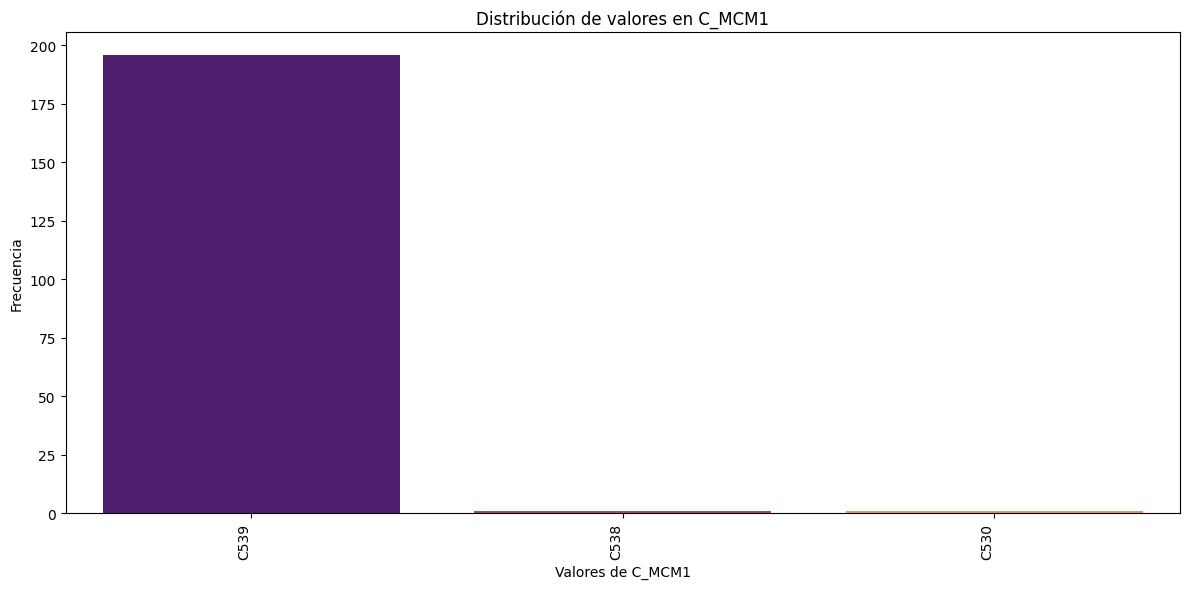

In [115]:
# Contar la frecuencia de valores en C_MCM1, excluyendo vacíos y comillas
frecuencia_mcm1 = df_juan['C_MCM1'].value_counts().drop(labels=['', '"'], errors='ignore')
print(frecuencia_mcm1)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia_mcm1.index[:20], y=frecuencia_mcm1.values[:20], palette="magma")  # Top 20 valores más comunes
plt.xlabel("Valores de C_MCM1")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores en C_MCM1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.tight_layout()
plt.show()


### Cada valor en IDPROFCER

In [ ]:
def crear_tabla_frecuencia(df, columna='IDPROFCER', excluir_valores=['', '"']):
    mapeo_categorias = {
        1: 'Médico',
        2: 'Enfermero',
        3: 'Auxiliar de enfermería',
        4: 'Promotor(a) de salud',
        5: 'Funcionario de registro civil',
        6: 'Médico Legista'
    }
    valores_validos = list(mapeo_categorias.keys()) + [9]
    df[columna] = pd.to_numeric(df[columna], errors='coerce')
    df_filtrado = df[df[columna].isin(valores_validos)]

    # Contar frecuencias y excluir valores no deseados
    frecuencia = (df_filtrado[columna]
                 .value_counts()
                 .drop(labels=[x for x in excluir_valores if x in df_filtrado[columna]], 
                       errors='ignore'))

    tabla = pd.DataFrame({
        'Valor': frecuencia.index,
        'Frecuencia': frecuencia.values
    })
    tabla['Valor'] = tabla['Valor'].apply(
        lambda x: x if x == 9 else mapeo_categorias.get(int(x) if pd.notna(x) else x, x)
    )
    total = frecuencia.sum()
    tabla['Porcentaje'] = (tabla['Frecuencia'] / total * 100).round(2)
    # Ordenar por frecuencia descendente y resetear índice
    tabla = tabla.sort_values('Frecuencia', ascending=False).reset_index(drop=True)

    return tabla


In [124]:
try:
    tabla_frecuencia = crear_tabla_frecuencia(df_juan)
    print(tabla_frecuencia)
    
except NameError:
    print("Error: El DataFrame 'df_juan' no está definido")
except Exception as e:
    print(f"Error inesperado: {str(e)}")

                           Valor  Frecuencia  Porcentaje
0                         Médico       19637       99.73
1         Auxiliar de enfermería          21        0.11
2           Promotor(a) de salud          14        0.07
3                      Enfermero          11        0.06
4                            9.0           7        0.04
5  Funcionario de registro civil           1        0.01


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/2249799884.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columna] = pd.to_numeric(df[columna], errors='coerce')


### Cada valor en CAUSA_666_667

CAUSA_666_667
209    32460
207     3526
Name: count, dtype: int64


/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/1135136611.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frecuencia_causa.values, y=frecuencia_causa.index, palette="Spectral")
/var/folders/ny/8v26_xzn60v_q_s1s3xc8wkm0000gn/T/ipykernel_33356/1135136611.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")


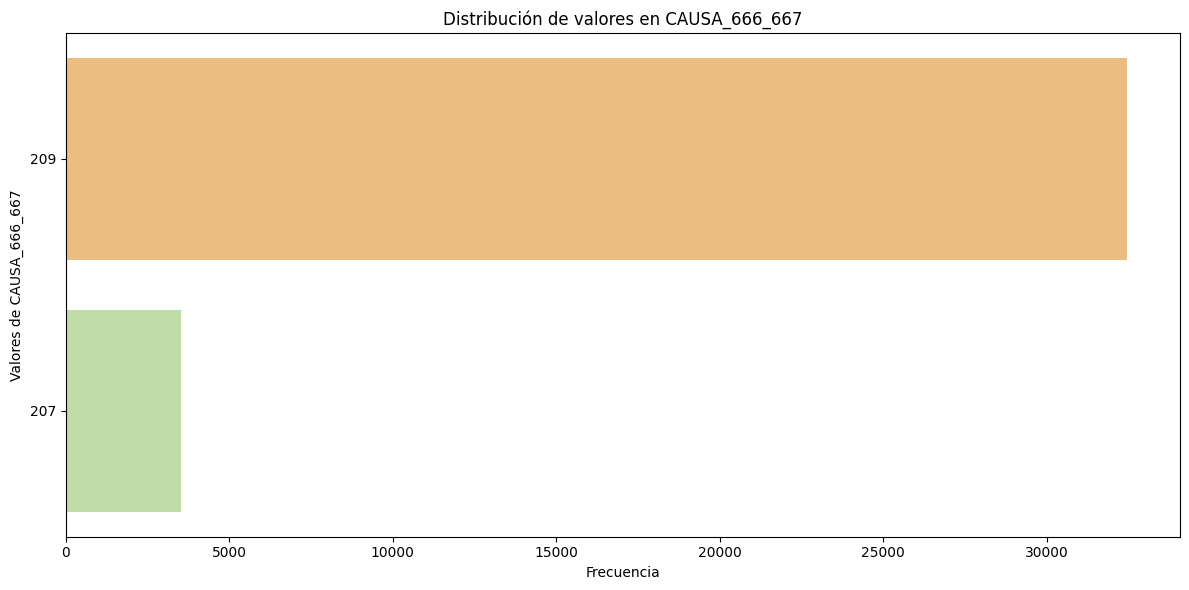

In [ ]:
frecuencia_causa = df_juan['CAUSA_666_667'].value_counts().drop(labels=['', '"'], errors='ignore')
print(frecuencia_causa)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=frecuencia_causa.values, y=frecuencia_causa.index, palette="Spectral")

# Configurar etiquetas y título
plt.xlabel("Frecuencia")
plt.ylabel("Valores de CAUSA_666_667")
plt.title("Distribución de valores en CAUSA_666_667")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")
plt.tight_layout()
plt.show()

### Cada valor en EDAD2

In [ ]:
# Calcular la frecuencia de EDAD2
frecuencia_edad = df_juan['EDAD2'].value_counts().drop(labels=['', '"'], errors='ignore')

# Estandarizar los nombres de los rangos y ordenarlos
mapeo_rangos = {
    '0A4': '0-4',
    '5a9': '5-9',
    '10a14': '10-14',
    '15a19': '15-19',
    '20a24': '20-24',
    '25a29': '25-29',
    '30a34': '30-34',
    '35a39': '35-39',
    '40a44': '40-44',
    '45a49': '45-49',
    '50a54': '50-54',
    '55a59': '55-59',
    '6064': '60-64',
    '65a69': '65-69',
    '70a74': '70-74',
    '75a79': '75-79',
    '80a84': '80-84',
    '85y+': '85+'
}

# Mapear los valores en la serie de frecuencias
frecuencia_edad.index = frecuencia_edad.index.map(mapeo_rangos)
orden_rangos = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', 
                '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', 
                '80-84', '85+']
frecuencia_edad = frecuencia_edad.reindex(orden_rangos)
print("Tabla de frecuencias para EDAD2 (Edad en rangos quinquenales):")
print(frecuencia_edad)

Tabla de frecuencias para EDAD2 (Edad en rangos quinquenales):
EDAD2
0-4         1
5-9         1
10-14       4
15-19    5213
20-24     197
25-29     868
30-34    2199
35-39    3555
40-44    4682
45-49    5532
50-54    4089
55-59    3926
60-64    3697
65-69    4683
70-74    4246
75-79    3522
80-84    2504
85+      2190
Name: count, dtype: int64


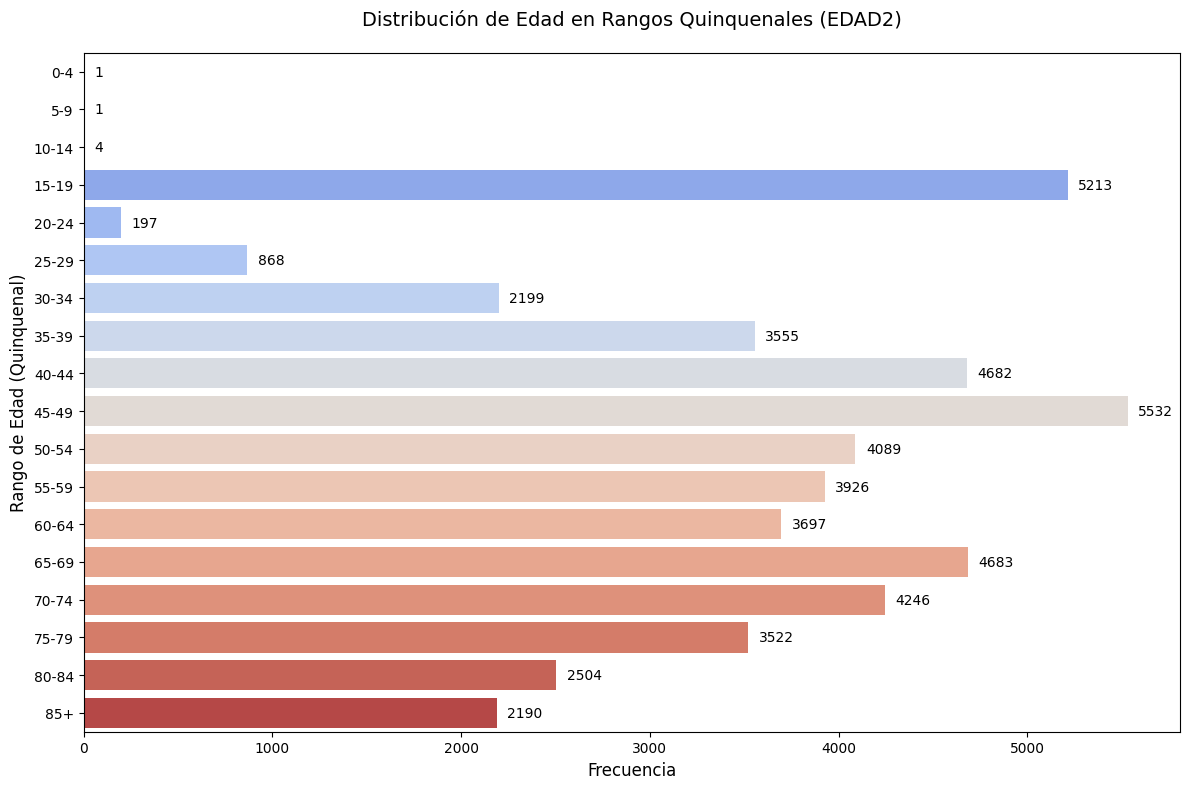

In [129]:
# Crear el gráfico
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=frecuencia_edad.values, y=frecuencia_edad.index, hue=frecuencia_edad.index, 
                 palette="coolwarm", legend=False)

# Configurar etiquetas y título
plt.xlabel("Frecuencia", fontsize=12)
plt.ylabel("Rango de Edad (Quinquenal)", fontsize=12)
plt.title("Distribución de Edad en Rangos Quinquenales (EDAD2)", fontsize=14, pad=20)

# Personalizar las etiquetas de los ejes
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Agregar etiquetas de datos en las barras
for i, v in enumerate(frecuencia_edad.values):
    ax.text(v + max(frecuencia_edad.values) * 0.01, i, f'{int(v)}', 
            va='center', ha='left', fontsize=10, color='black')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()